#Cargo las librerias y lo necesario

In [ ]:
pip install seaborn

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
parquet_file = '/content/drive/MyDrive/Colab Notebooks/TP2/train.parq'

In [ ]:
train_set = pd.read_parquet(parquet_file)

In [ ]:
train_set['attack_time'] = train_set['attack_time'].dt.hour + train_set['attack_time'].dt.minute / 60.0

In [ ]:
train_set

,attack_time,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label
0,7.283333,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:exploit,0,6466,0
1,7.283333,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:spam,0,6466,0
2,7.283333,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:bruteforce,2,4637,0
3,7.283333,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:spam,2,4637,0
4,7.283333,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:exploit,2,4637,0
...,...,...,...,...,...,...,...,...,...,...,...
61629680,21.233333,DE,12897.0,ENTEGA Medianet GmbH,DE,3209.0,Vodafone GmbH,http:scan,24879,190784,0
61629681,21.233333,US,22612.0,NAMECHEAP-NET,US,23033.0,WOW,http:scan,40383,193446,0
61629682,21.233333,US,22612.0,NAMECHEAP-NET,US,23033.0,WOW,http:spam,40383,193446,0
61629683,21.233333,US,22612.0,NAMECHEAP-NET,US,23033.0,WOW,http:spam,40383,193446,0


Almacenamos algunos valores que nos seran de utilidad

In [ ]:
#Me interesa saber que attacker AS tienen mayor cantidad de ceros

In [ ]:
top_attack_types_0 = train_set[train_set['label'] == 0]['attacker_as_name'].value_counts().head(25)
top_attack_types_0

DIGITALOCEAN-ASN                                     5064220
MICROSOFT-CORP-MSN-AS-BLOCK                          4373283
OVH SAS                                              2882987
Hetzner Online GmbH                                  1719091
GOOGLE-CLOUD-PLATFORM                                1709242
Delis LLC                                            1694013
Chinanet                                             1681565
AMAZON-02                                            1488897
Belcloud LTD                                         1467123
AMAZON-AES                                           1185321
GO-DADDY-COM-LLC                                      994081
AS-26496-GO-DADDY-COM-LLC                             951226
M247 Europe SRL                                       878141
Deutsche Telekom AG                                   821485
Contabo GmbH                                          774836
DREAMHOST-AS                                          654960
ORACLE-BMC-31898        

In [ ]:
ceros = train_set[train_set['attacker_as_name'].isin(top_attack_types_0.index)]
ceros['attacker_as_name'] = ceros['attacker_as_name'].cat.remove_unused_categories()

<ipython-input-10-43ca780860af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ceros['attacker_as_name'] = ceros['attacker_as_name'].cat.remove_unused_categories()


In [ ]:
#Y ahora me interesa saber los atacantes AS que mas 1 tengan pero que no esten entre los que mas ceros tengan ya que siendo asi podrian
#ser muy dificiles de identificar basandonos en el AS

In [ ]:
top_attack_types_1 = train_set[train_set['label'] == 1]['attacker_as_name'].value_counts().head(50)
top_attack_types_1 = top_attack_types_1[~top_attack_types_1.index.isin(top_attack_types_0.index)].head(25)
top_attack_types_1

AMANAHA-NEW                                      108698
AS11938                                          106126
Rostelecom                                        54603
Biterika Group LLC                                41023
Packet Exchange Limited                           30103
Zwiebelfreunde e.V.                               26067
SERVER-MANIA                                      24410
AS-COLOCROSSING                                   15728
Orion Network Limited                             15602
Hivelocity Inc                                    15403
Bach Kim Network solutions Join stock company     14742
F3 Netze e.V.                                     13882
PONYNET                                           13714
24SHELLS                                          10904
THIN-NOLOGY                                        8346
AS-SPRIO                                           8049
QUINTEX                                            7849
HostRoyale Technologies Pvt Ltd                 

In [ ]:
unos = train_set[train_set['attacker_as_name'].isin(top_attack_types_1.index)]
unos['attacker_as_name'] = unos['attacker_as_name'].cat.remove_unused_categories()

<ipython-input-13-0fcfe3ce8d24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unos['attacker_as_name'] = unos['attacker_as_name'].cat.remove_unused_categories()


In [ ]:
mix = train_set[(train_set['attacker_as_name'].isin(top_attack_types_0.index))|(train_set['attacker_as_name'].isin(top_attack_types_1.index))]

# BARPLOT

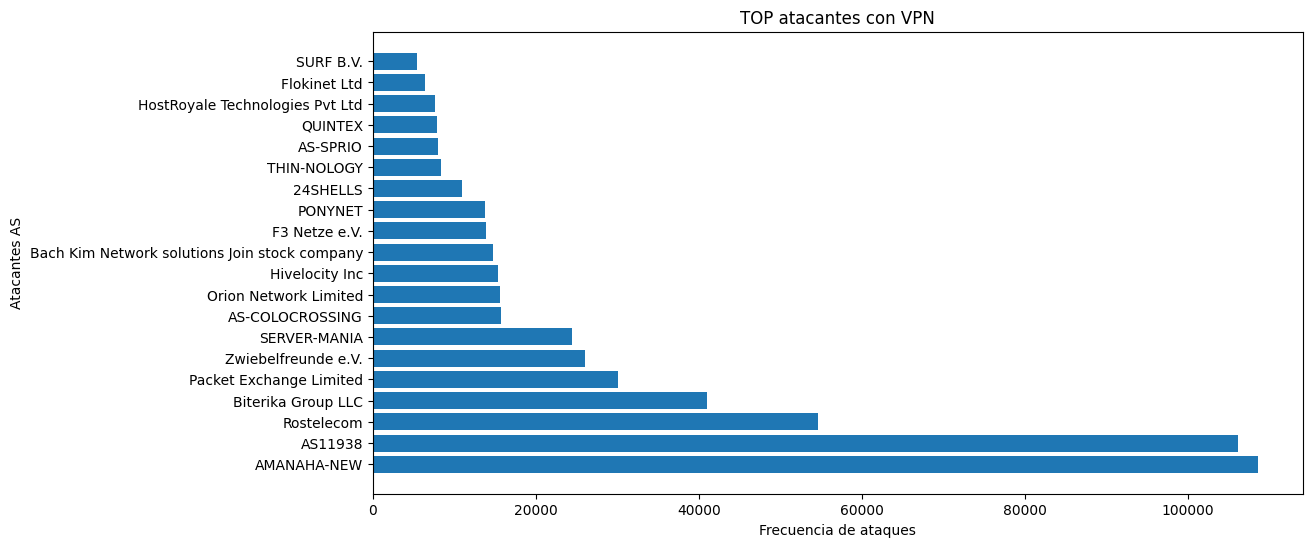

In [ ]:
unos_plot = unos[unos['label'] == 1]
conteo_atacantes_unos = unos_plot['attacker_as_name'].value_counts().reset_index()
conteo_atacantes_unos.columns = ['attacker_as_name', 'Frecuencia']
conteo_atacantes_unos = conteo_atacantes_unos.sort_values(by='Frecuencia', ascending=False)

top_20_AS_uno = conteo_atacantes_unos.head(20)

plt.figure(figsize=(12, 6))
plt.barh(top_20_AS_uno['attacker_as_name'], top_20_AS_uno['Frecuencia'])
plt.xlabel('Frecuencia de ataques')
plt.ylabel('Atacantes AS')
plt.title('TOP atacantes con VPN')
plt.show()

# HEATMAP

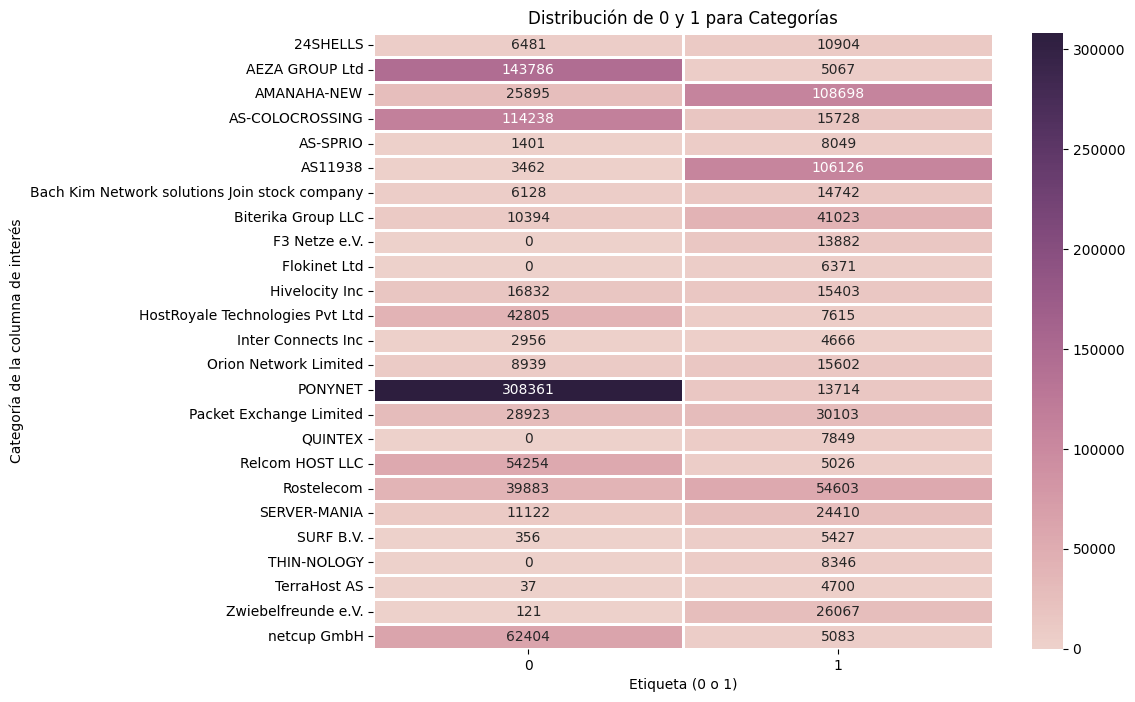

In [ ]:
contingency_table = pd.crosstab(unos['attacker_as_name'], unos['label'])

plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='d', cbar=True, linewidths=1)
plt.xlabel('Label')
plt.ylabel('Categorias de attacker_as_name')
plt.title('Distribución de 0 y 1 para TOP Categorías con label = 1')
plt.show()

#Plot 2D con distribucion marginal

In [ ]:
df_label_1 = train_set[train_set['label'] == 1]

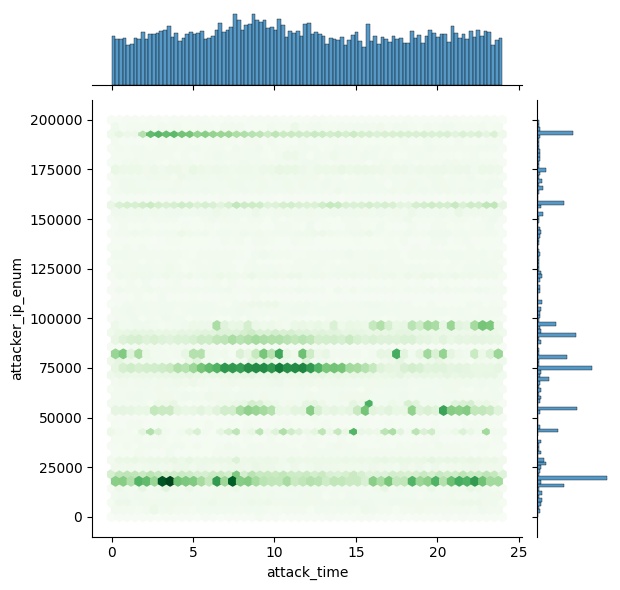

In [ ]:
sns.jointplot(data=df_label_1, x="attack_time", y="attacker_ip_enum", kind="hex", cmap='Greens')
plt.show()

In [ ]:
del df_label_1

#Obligatoria IV

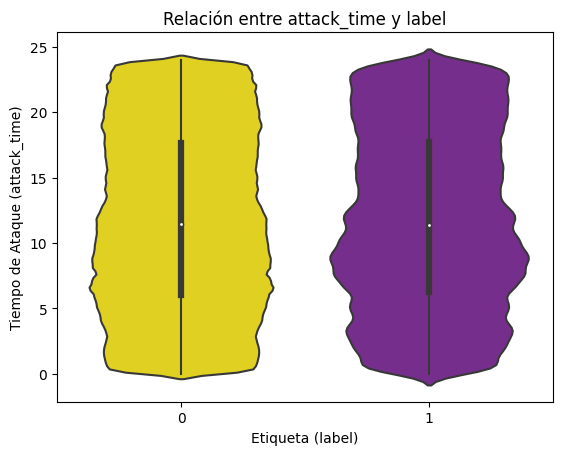

In [ ]:
custom_palette3 = sns.color_palette(["#FFEA03", "#7E1E9C"])
sns.violinplot(x='label', y='attack_time', data=train_set, palette=custom_palette3)
plt.xlabel('Etiqueta (label)')
plt.ylabel('Tiempo de Ataque (attack_time)')
plt.title('Relación entre attack_time y label')
plt.show()

#Obligatoria V

In [ ]:
top_countries_label1 = train_set[train_set['label'] == 1]['attacker_country'].value_counts().head(30).index.tolist()
filtered_df_label1 = train_set[(train_set['attacker_country'].isin(top_countries_label1))]
filtered_df_label1['attacker_country'] = filtered_df_label1['attacker_country'].cat.remove_unused_categories()

<ipython-input-16-9f156c9112dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_label1['attacker_country'] = filtered_df_label1['attacker_country'].cat.remove_unused_categories()


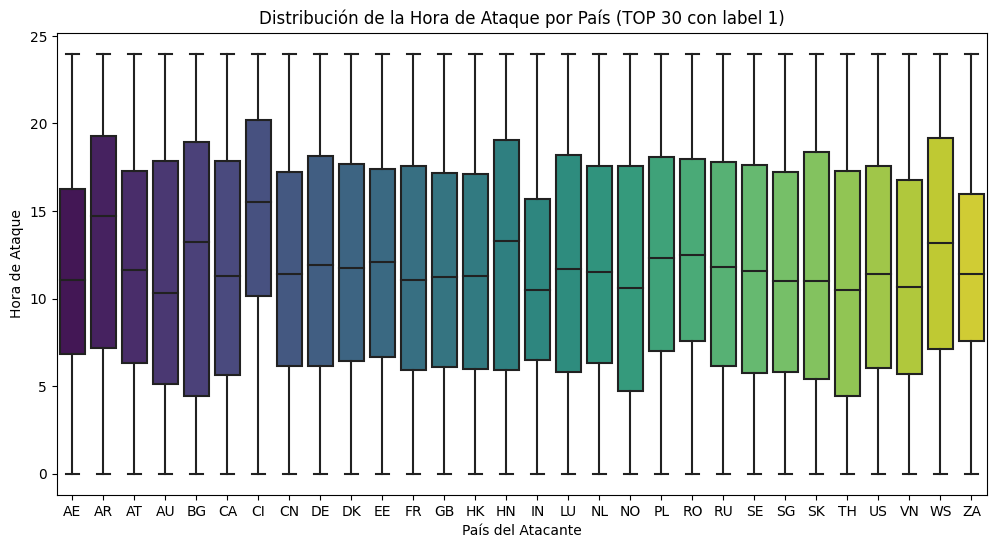

In [ ]:
# Crea el gráfico de caja y bigotes (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='attacker_country', y='attack_time', data=filtered_df_label1, palette='viridis')

# Ajusta las etiquetas y el título del gráfico
plt.xlabel('País del Atacante')
plt.ylabel('Hora de Ataque')
plt.title('Distribución de la Hora de Ataque por País (TOP 30 con label 1)')

# Muestra el gráfico
plt.show()

In [ ]:
del top_countries_label1
del filtered_df_label1

#Obligatoria VI

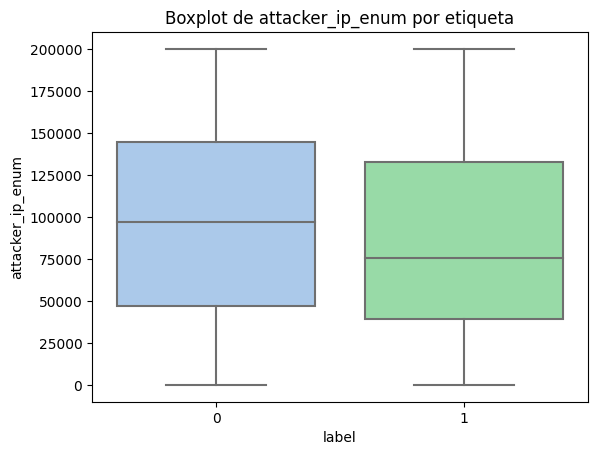

In [ ]:
custom_palette = ['#a1c9f4', '#8de5a1']
sns.boxplot(x='label', y='attacker_ip_enum', data=train_set, palette=custom_palette)
plt.title('Boxplot de attacker_ip_enum por etiqueta')
plt.show()

#Extras

In [ ]:
top_20_label_1 = train_set[train_set['label'] == 1]['attacker_country'].value_counts().head(20).index
mix2 = train_set[train_set['attacker_country'].isin(top_10_label_1)]

In [ ]:
mix2['attacker_country'] = mix2['attacker_country'].cat.remove_unused_categories()

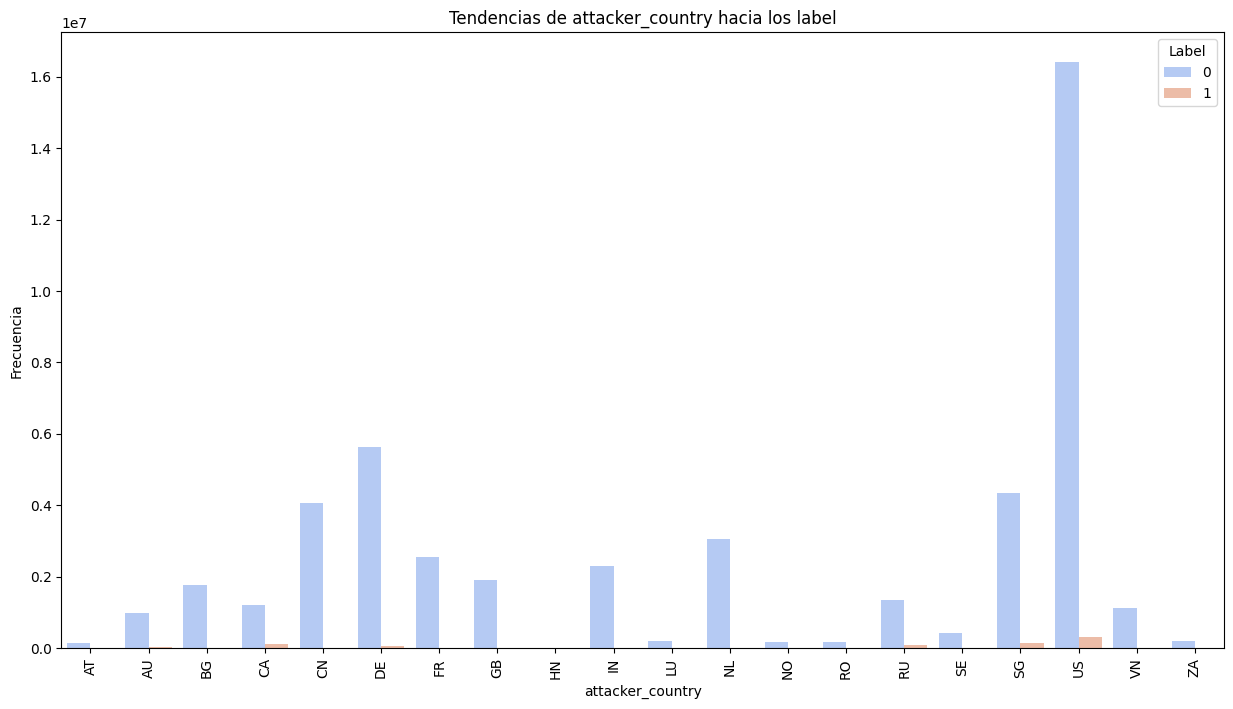

In [ ]:
df_freq = mix2.groupby(['attacker_country', 'label']).size().reset_index(name='frequency')

plt.figure(figsize=(15, 8))
sns.barplot(x='attacker_country', y='frequency', hue='label', data=df_freq, palette='coolwarm')
plt.title('Tendencias de attacker_country hacia los label')
plt.xlabel('attacker_country')
plt.ylabel('Frecuencia')
plt.legend(title='Label', loc='upper right')
plt.xticks(rotation=90)
plt.show()

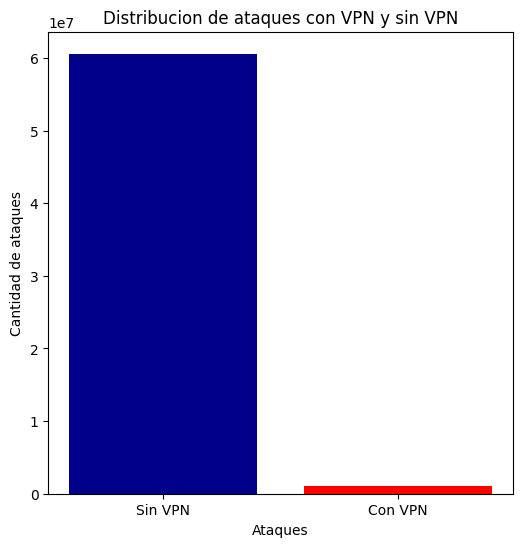

In [ ]:
conteo_labels = train_set['label'].value_counts().reset_index()
conteo_labels.columns = ['Label', 'Cantidad de Apariciones']
conteo_labels['Label'] = ['Sin VPN', 'Con VPN']

plt.figure(figsize=(6, 6))
plt.bar(conteo_labels['Label'], conteo_labels['Cantidad de Apariciones'], color=['darkblue', 'red'])
plt.xlabel('Ataques')
plt.ylabel('Cantidad de ataques')
plt.title('Distribucion de ataques con VPN y sin VPN')
plt.show()

In [ ]:
top_countries_label0 = train_set[train_set['label'] == 0]['attacker_country'].value_counts().head(30).index.tolist()
filtered_df_label0 = train_set[(train_set['attacker_country'].isin(top_countries_label0))]
filtered_df_label0['attacker_country'] = filtered_df_label0['attacker_country'].cat.remove_unused_categories()

<ipython-input-18-fc3df36c21e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_label0['attacker_country'] = filtered_df_label0['attacker_country'].cat.remove_unused_categories()


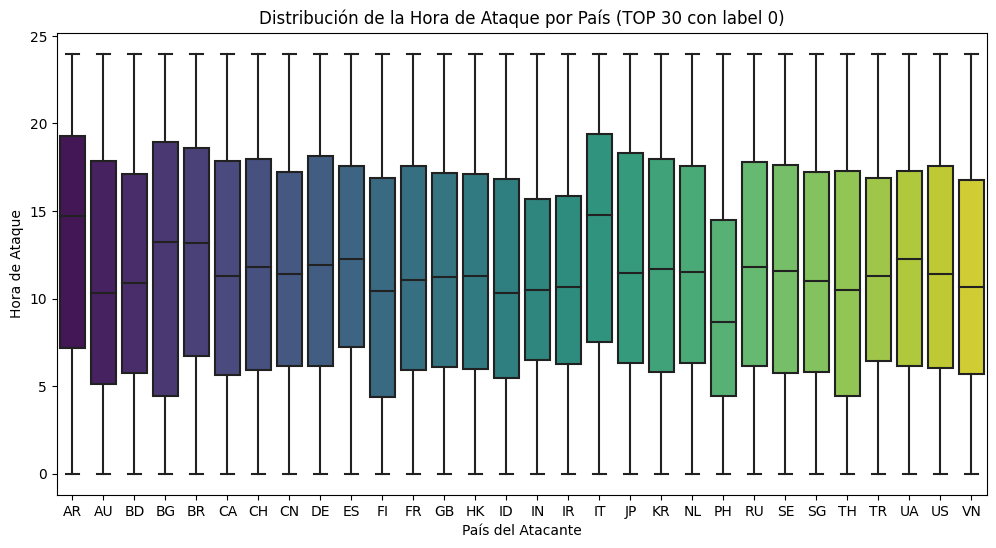

In [ ]:
# Crea el gráfico de caja y bigotes (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='attacker_country', y='attack_time', data=filtered_df_label0, palette='viridis')

# Ajusta las etiquetas y el título del gráfico
plt.xlabel('País del Atacante')
plt.ylabel('Hora de Ataque')
plt.title('Distribución de la Hora de Ataque por País (TOP 30 con label 0)')

# Muestra el gráfico
plt.show()

In [ ]:
del top_countries_label0
del filtered_df_label0

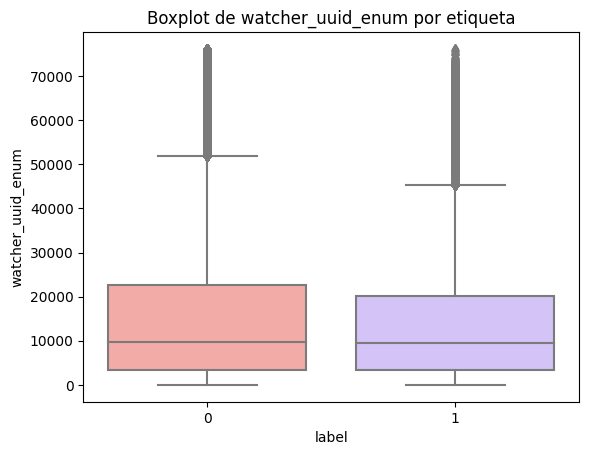

In [ ]:
custom_palette2 = ['#ff9f9b', '#d0bbff']
sns.boxplot(x='label', y='watcher_uuid_enum', data=train_set, palette=custom_palette2)
plt.title('Boxplot de watcher_uuid_enum por etiqueta')
plt.show()

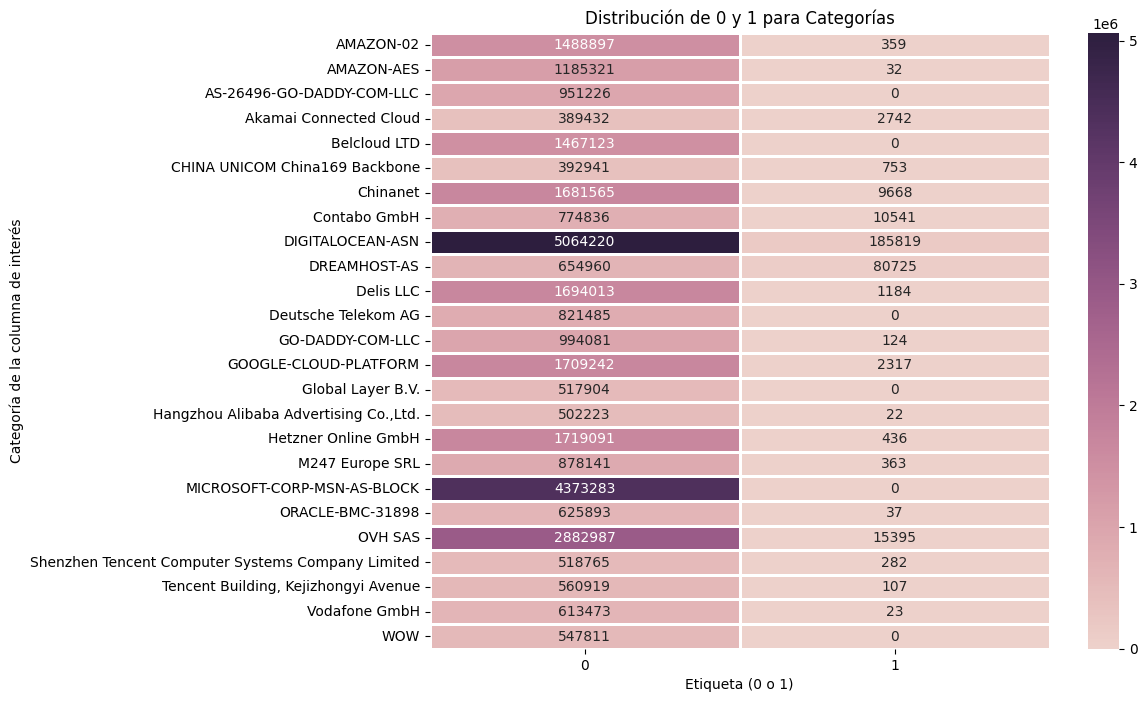

In [ ]:
contingency_table = pd.crosstab(ceros['attacker_as_name'], ceros['label'])

plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='d', cbar=True, linewidths=1)
plt.xlabel('Label')
plt.ylabel('Categorias de attacker_as_name')
plt.title('Distribución de 0 y 1 para TOP Categorías con label = 0')
plt.show()

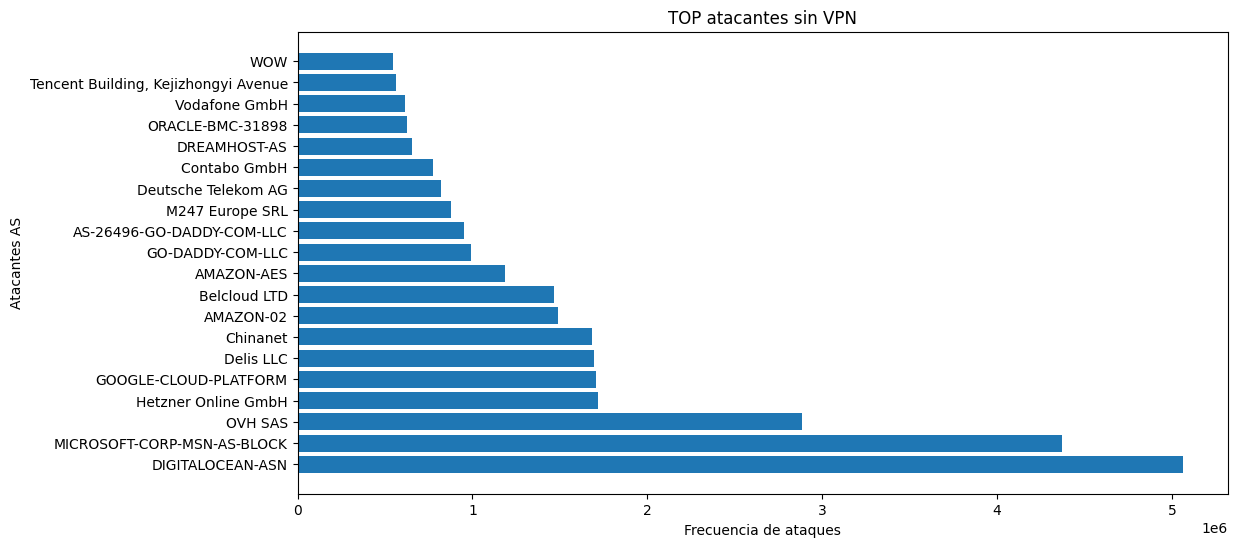

In [ ]:
ceros_plot = ceros[ceros['label'] == 0]
conteo_atacantes_ceros = ceros_plot['attacker_as_name'].value_counts().reset_index()
conteo_atacantes_ceros.columns = ['attacker_as_name', 'Frecuencia']
conteo_atacantes_ceros = conteo_atacantes_ceros.sort_values(by='Frecuencia', ascending=False)

top_20_AS_cero = conteo_atacantes_ceros.head(20)

plt.figure(figsize=(12, 6))
plt.barh(top_20_AS_cero['attacker_as_name'], top_20_AS_cero['Frecuencia'])
plt.xlabel('Frecuencia de ataques')
plt.ylabel('Atacantes AS')
plt.title('TOP atacantes sin VPN')
plt.show()